In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 20.5MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.layers import BatchNormalization,Dropout

In [21]:
# generators
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [22]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [23]:
#implementing the cnn model
cnn = models.Sequential([
    #convolutional layer1
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)),
    BatchNormalization(),
    #maxpooling1
    layers.MaxPool2D((2,2),strides=2,padding='same'),

    #convolutional layer2
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)),
    BatchNormalization(),
    #maxpooling2
    layers.MaxPool2D((2,2),strides=2,padding='same'),

    #convolutional layer3
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)),
    BatchNormalization(),
    #maxpooling3
    layers.MaxPool2D((2,2),strides=2,padding='same'),

    #fully connected layer
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    Dropout(0.1),
    layers.Dense(64,activation='relu'),
    Dropout(0.1),
    layers.Dense(1,activation='sigmoid')



])

In [24]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [25]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [26]:
cnn.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.2769 - accuracy: 0.5370 - val_loss: 0.7992 - val_accuracy: 0.5104
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6892 - accuracy: 0.5425 - val_loss: 0.6541 - val_accuracy: 0.5910
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.6339 - accuracy: 0.6316 - val_loss: 0.7626 - val_accuracy: 0.6648
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5670 - accuracy: 0.6993 - val_loss: 0.5562 - val_accuracy: 0.7272
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5087 - accuracy: 0.7393 - val_loss: 0.5204 - val_accuracy: 0.7406
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4666 - accuracy: 0.7606 - val_loss: 0.4945 - val_accuracy: 0.7802
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4083 - accuracy: 0.7912 - val_loss: 0.4610 - val_ac

In [27]:
import cv2


In [28]:
test_img = cv2.imread('/content/cat.jpg')

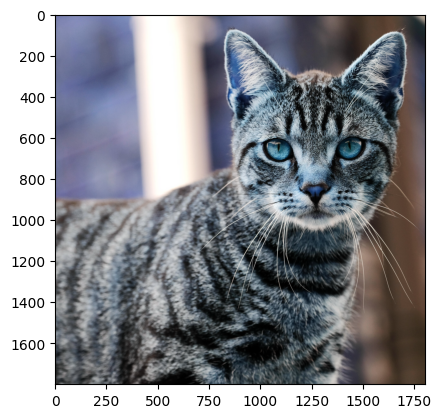

In [29]:
plt.imshow(test_img)

In [30]:
test_img.shape

(1800, 1800, 3)

In [31]:
test_img=cv2.resize(test_img,(256,256))

In [32]:
test_input= test_img.reshape((1,256,256,3))

In [34]:
pred=cnn.predict(test_input)

1/1 [==============================] - 0s 264ms/step


In [35]:
pred

array([[0.]], dtype=float32)